# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [18]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# Using WHRDataSet
filename = os.path.join(WHRDataSet_filename)
df = pd.read_csv(filename, header=0)

# Inspecting data
df.head(5)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [19]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [20]:
df.shape

(1562, 19)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. List the data set you have chosen.
- World Happiness Report (WHR) data set
  
2. What will you be predicting? What is the label?
- We will be predicting the level of social support based on other relevant features and the label is “Social support”.

3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
- It will be a supervised learning problem. We will be creating a regression model to output a social support rate.

4. What are your features? (note: this list may change after your explore your data)
- All features except for social support (may be subjected to change). 

5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?
- This problem is important because it’ll be useful for countries to understand how different aspects of the country, on a social, political, and economic scale, affect how supported their citizens feel. With this prediction, they can focus on areas of life to improve based on what features are lowering the social support rating.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Inspecting & replacing null values with averages, based on country
def replace_na_with_mean(df, category, values):
    # Ensure values is a list
    if isinstance(values, str):
        values = [values]
    
    for col in values:
        # Calculate means per category
        if df[col].dtype == np.float64:
            mean_vals = df.groupby(category)[col].transform('mean')
            if mean_vals.isna().any():
                df[col] = df[col].fillna(0)
            else:
                df[col] = df[col].fillna(mean_vals)
                
            # Print the count of NaNs after replacement
            nan_count = df[col].isna().sum()
            # print(f"{col} NaN count after replacement: {nan_count}")

    return df

# Checking how many nulls are present
missing_values = df.isnull().sum()
print("Missing counts per column before replacement:")
print(missing_values)
print("\n")


# Replacing Nulls with Averages
df_na = replace_na_with_mean(df, category='country', values=df.columns)
df_na.head(10)
df_na[df_na.isna().any(axis=1)]

# Drop un-needed columns
df = df_na.drop('country', axis=1)
df = df.drop('year', axis=1)
df = df.drop('GINI index (World Bank estimate)', axis=1)
df = df.drop('GINI index (World Bank estimate), average 2000-15', axis=1)
df = df.drop('gini of household income reported in Gallup, by wp5-year', axis=1)

# Checking that nulls are no longer present
print("Missing counts per column after replacement & columns dropped:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n")






Missing counts per column before replacement:
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year              

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
- Our new feature list is: 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year']
- We chose to get rid of country and year, as they were string values that couldn't be processed. Further they added no predictive value to the entries. We also got rid of GINI index (World Bank estimate) - due to a high number of null values (over 900), GINI index (World Bank estimate), average 2000-15 and gini of household income reported in Gallup, by wp5-year. The ladder two were removed because they were aggregated based on multiple years, and we believed that may skew the data, as most of the other features depend on the single year the entry is referring to.
  
Explain different data preparation techniques that you will use to prepare your data for modeling.
Inspecting the shape, size, data types and other characteristics of the data
- Replacing null values with averages. We chose to do this as replacing all null values with a single value such as 0 could introduce bias and skew the data.
- This data did not need one-hot encoding, as we chose to use only features with numeric values.
  
What is your model (or models)?
- Regression Decision Tree

Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.
- Plan:
    1. Prepare data.
    2. Define datasets X (for features) and y (for the label)
    3. Create the decision tree model
    4. Create training/testing splits of the data
    5. Fit the data using the training data
    6. Evaluation & Improvment of the Model:
       - Compute Mean Squared Error
       - Tune Hyperparameters
       - Use k-fold cross validation
    7. Use graphs to visualize the difference between the original and tuned model


In [23]:
df.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year'],
      dtype='object')

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [30]:
# Define X and y
y = df['Social support']
X = df.drop(columns = 'Social support', axis=1)


# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

# Define the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Compute MSE for evaluation
y_pred = model.predict(X_test)
initial_mse= mean_squared_error(y_test, y_pred)

# Hyperparameter Tuning
param_grid = {'max_depth': [10, 50, 100, 1000, 10000], 'min_samples_leaf': [5, 10, 20]}  # Adjust values as needed

# Define the custom scoring function
scoring = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, verbose=1, n_jobs=-1)
grid_search = grid.fit(X_train, y_train)

# Determine best features
best_md = grid_search.best_params_['max_depth']
best_min_leaf = grid_search.best_params_['min_samples_leaf']
model_best = grid_search.best_estimator_

print(f"Best max_depth: {best_md}")
print(f"Best min_leaf: {best_min_leaf}")

# Calculate Post Tuninhg MSE for evaluation
y_pred = model_best.predict(X_test)
post_mse = mean_squared_error(y_test, y_pred)

# K Fold Cross Validation 
cv_dt_scores = cross_val_score(model,X,y,cv = 5)
cv_dt_scores_best = cross_val_score(model_best,X,y,cv = 5)
print("\n")
print("Cross Validation Scores (Old Model):")
print(cv_dt_scores)
print("Cross Validation Scores (Tuned Model):")
print(cv_dt_scores_best)

# Compare the initial and post-tuning MSEs
print("\n")
print("Mean Squared Error (Old Model):")
print(initial_mse)
print("Mean Squared Error (Tuned Model):")
print(post_mse)

print("The MSE became lower on the tuned model, indicating the predictions became more accurate/close to the real values:")








Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best max_depth: 10
Best min_leaf: 5


Cross Validation Scores (Old Model):
[ 0.18518044 -0.33885512 -1.67452334 -0.00806018 -0.02869647]
Cross Validation Scores (Tuned Model):
[0.3640709  0.20355519 0.02957072 0.3995835  0.1080619 ]


Mean Squared Error (Old Model):
0.013183764886025755
Mean Squared Error (Tuned Model):
0.011753228085107714
The MSE became lower on the tuned model, indicating the predictions became more accurate/close to the real values:


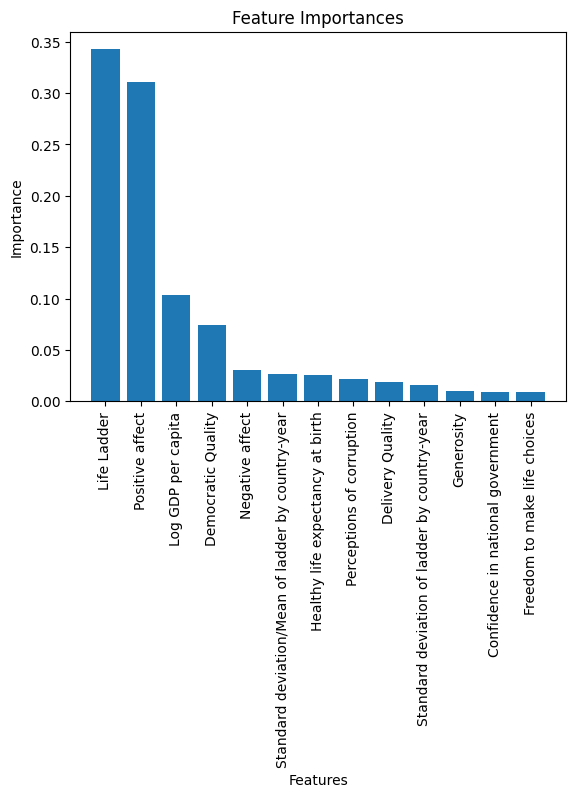

In [31]:
# Illustrating the importance of each feature to the model
importances = model_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) 
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

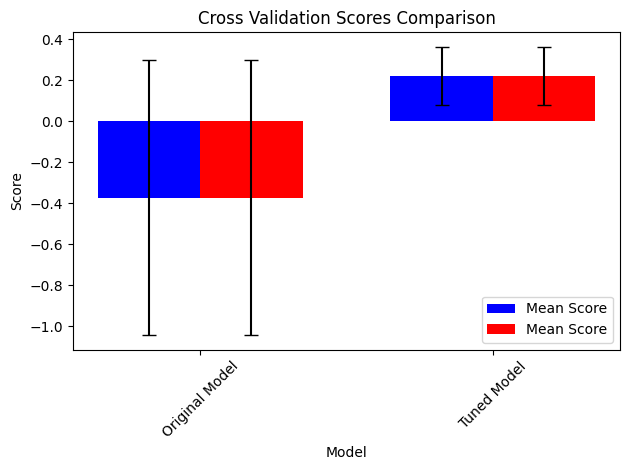

In [32]:
# Comparing the cross validation scores between the two models

# Calculating mean and standard deviation between the old and new moodel
# Old Model
mean_cv_dt_scores = np.mean(cv_dt_scores)
std_cv_dt_scores = np.std(cv_dt_scores)

# New Model
mean_cv_dt_scores_best = np.mean(cv_dt_scores_best)
std_cv_dt_scores_best = np.std(cv_dt_scores_best)

# Chart to compare models
models = ['Original Model', 'Tuned Model']
mean_scores = [mean_cv_dt_scores, mean_cv_dt_scores_best]
std_scores = [std_cv_dt_scores, std_cv_dt_scores_best]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mean_scores, width, yerr=std_scores, label='Mean Score', capsize=5, color='b')
bars2 = ax.bar(x + width/2, mean_scores, width, yerr=std_scores, label='Mean Score', capsize=5, color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Cross Validation Scores Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The tuned models scores were consistently positive, and higher indicating better performance with the tuned model. This means the tuned model will be better able to generalize to new data. Meanwhile the original models scores were very low and sometimes negative which indicateds the model had poor performance. They also had high variance, meaning the model likely wasn't consistent in it's predictions.